# 图25 分布式包点图

分布式包点图显示了按组分割的点的单变量分布。点越暗，该区域中数据点的集中度越高。通过对中位数进行不同的着色，组的真实位置立即变得明显。

原代码运行报错`ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()`，将`ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)`改为以下代码段：
```python
for index, row in df_make.iterrows():
    ax.scatter(y=i, x='cty', data=row, s=75, edgecolors='gray', c='w', alpha=0.5)
```

D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


1.23.5
2.0.0
3.7.1
0.12.2


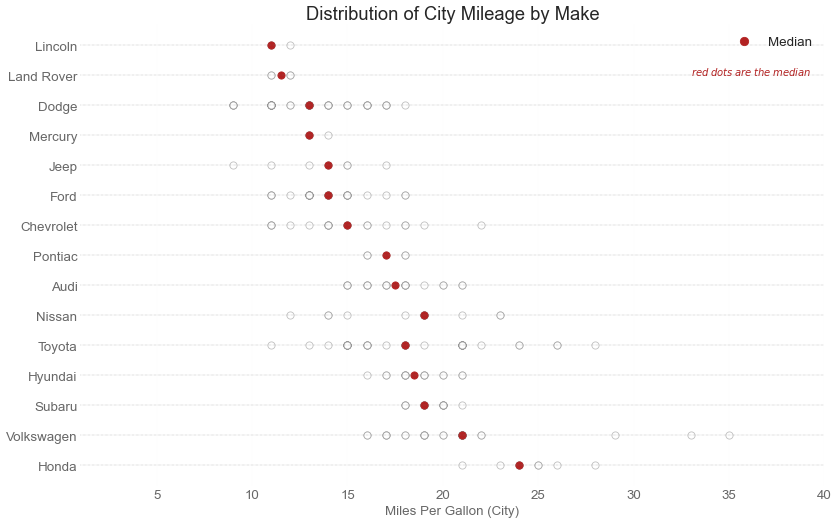

In [1]:
from doc.Plot.require import *
import matplotlib.patches as mpatches

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

cyl_colors = {4: 'tab:red', 5: 'tab:green', 6: 'tab:blue', 8: 'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16, 10), dpi=60)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=0.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer == make, :]
    for index, row in df_make.iterrows():
        ax.scatter(y=i, x='cty', data=row, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index == make, :], s=75, c='firebrick')

# Annotate
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size': 12}, color='firebrick')

# Decorations
red_patch = plt.plot([], [], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size': 22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis='both', alpha=.4, linewidth=0.1)

plt.show()